In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
folder_path = 'Cashew Kernel Classification.v2i.multiclass/Train_data/train'
images = []
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(folder_path, filename)
        with Image.open(img_path) as img:
            images.append(np.array(img))
labels = [filename[:4] for filename in os.listdir(folder_path) if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
label_mapping = {label: idx for idx, label in enumerate(np.unique(labels))}
encoded_labels = np.array([label_mapping[label] for label in labels])
categorical_labels = to_categorical(encoded_labels)
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') 
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(np.array(X_train), np.array(y_train), epochs=20, validation_split=0.2, batch_size=16)  

C:\Users\EXAM-OS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 81s 466ms/step - accuracy: 0.8595 - loss: 71.4852 - val_accuracy: 1.0000 - val_loss: 3.7589e-09
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 77s 462ms/step - accuracy: 1.0000 - loss: 4.0736e-06 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 77s 461ms/step - accuracy: 1.0000 - loss: 4.4324e-06 - val_accuracy: 1.0000 - val_loss: 3.7588e-07
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 78s 464ms/step - accuracy: 1.0000 - loss: 6.2907e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 77s 462ms/step - accuracy: 1.0000 - loss: 4.4645e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 77s 461ms/step - accuracy: 1.0000 - loss: 5.1235e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 77s 462ms/step - accuracy: 1.0000 - loss: 1.9201e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
167/167 ━━━━━━━━━━━

In [4]:
test_loss, test_accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0
Test Accuracy: 1.0


In [5]:

model.save('my_model.h5')


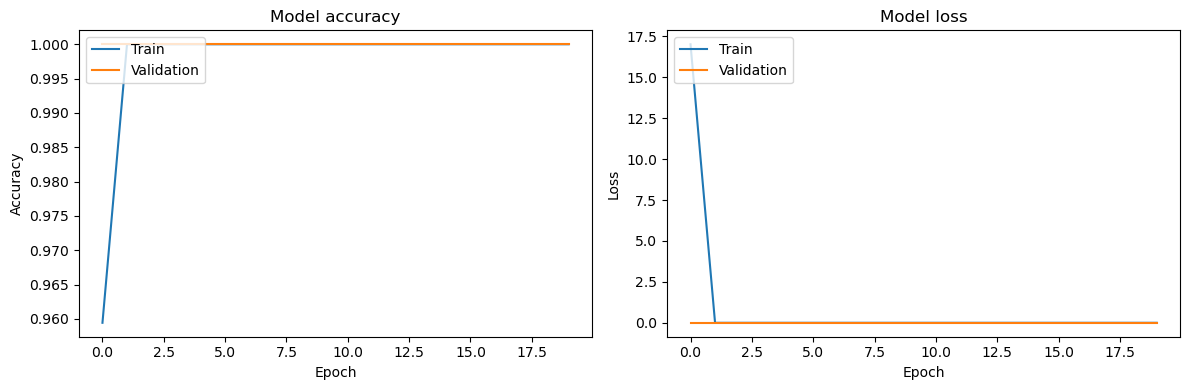

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
image_paths = ['Cashew Kernel Classification.v2i.multiclass/Test_data/test/W180_1.jpg', 'Cashew Kernel Classification.v2i.multiclass/Test_data/test/W320_102.jpg', 'Cashew Kernel Classification.v2i.multiclass/Test_data/test/W400_163.jpg']
X_new = []
for img_path in image_paths:
    img = load_img(img_path, target_size=(224, 224))  
    img_array = img_to_array(img)
    img_array = img_array / 255.0  
    X_new.append(img_array)

X_new = np.array(X_new)
predictions = model.predict(X_new)
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
[0 1 2]
